# About Adult Dataset

-> **income**(target): whether or not an individual makes more than $50,000 annually.(<= 50K, >50K)

-> **age**: the age of an individual. (Integer > 0)

-> **workclass**: represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

-> **fnlwgt** (final weight): this is the number of people the census believes the entry represents. People with similar  characteristics should have similar weights

-> **education**: level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)

-> **education-num**: the level of education achieved in numerical form. (Integer >0)

-> **marital-status**: marital status of an individual (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)

-> **occupation**: type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

-> **relationship**: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)

-> **race**: Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

--> gender: (Male, female)

-> **capital-gain**: capital gains for an individual. (>=0)

-> **capital-loss**: capital loss for an individual. (>= 0)

->**hours-per-week**: the hours an individual has reported to work per week. (continuous)

In [22]:
#import lib
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns

In [23]:
#read dataset
df = pd.read_csv("adult.csv")

# EDA of the dataset

In [24]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


data not have missing value.

data contain 48842 entries, 0 to 48841

In [26]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Age: Discrete (from 17 to 90).

Education Number : Discrete (from 1 to 16).

hours-per-week: Discrete (from 1 to 99)

capital gain & loss that has 0 value in (min, 25%, 50%, 75%) that we can drop that


In [27]:
# checking missing values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

not missing value in the data

In [28]:
## Check for Duplicates and Remove
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [29]:
df.replace('?', np.NaN, inplace = True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [30]:
import pandas as pd

# Drop rows with null values
df.dropna(inplace=True)

# Remove quotation marks from string columns
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)


In [31]:
#  Way to see unique values
for col in df.select_dtypes(include="object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("**********************************************************")

workclass
***
workclass
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64
**********************************************************
education
***
education
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: count, dtype: int64
**********************************************************
marital-status
***
marital-status
Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           

Work class : (7 categories)

Education : Ordinal (16 categories)

Marital Status: Nominal (7 categories)

Occupation : Nominal (15 categories)

Relationship : Nominal (6 categories)

Race: Nominal (5 categories)

Gender: Nominal (2 categories)

In [32]:
df.education.value_counts(dropna=False)

education
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: count, dtype: int64

In [33]:
df["educational-num"].value_counts(dropna=False)

educational-num
9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: count, dtype: int64

In [34]:
df.groupby("education")["educational-num"].value_counts(dropna=False)

education     educational-num
10th          6                   1223
11th          7                   1619
12th          8                    575
1st-4th       2                    220
5th-6th       3                    447
7th-8th       4                    822
9th           5                    676
Assoc-acdm    12                  1507
Assoc-voc     11                  1958
Bachelors     13                  7559
Doctorate     16                   544
HS-grad       9                  14770
Masters       14                  2513
Preschool     1                     70
Prof-school   15                   785
Some-college  10                  9887
Name: count, dtype: int64

we see education and educational-num are the same

# Data Visualization

<Axes: >

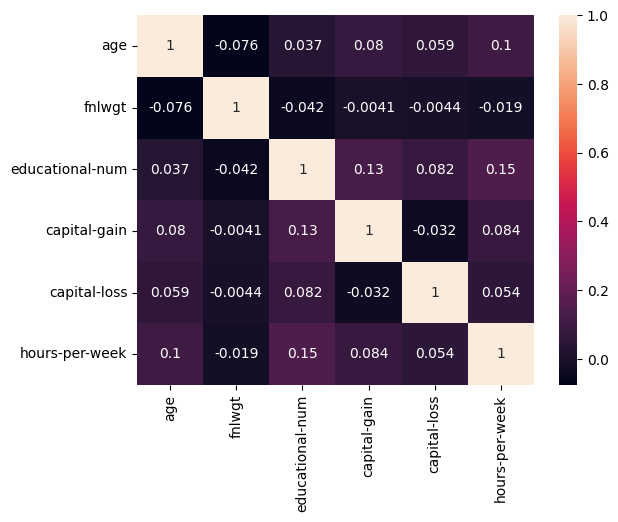

In [35]:
sns.heatmap(data=df.select_dtypes("number").corr(), annot=True)

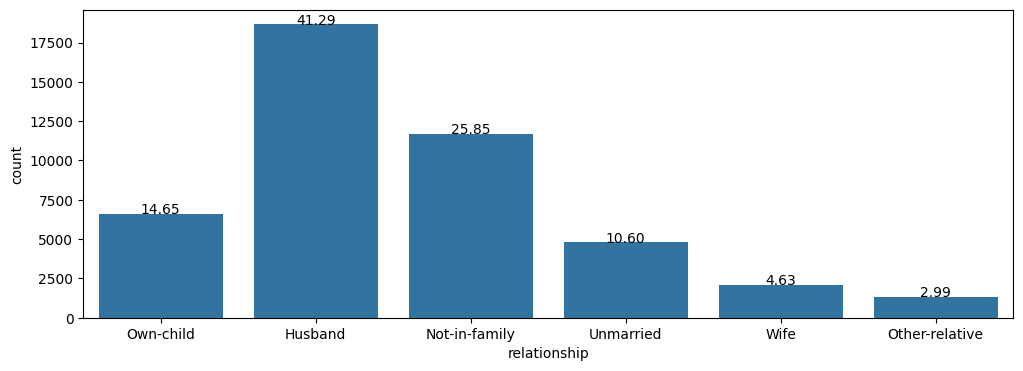

In [36]:
plt.figure(figsize=(12,4))
total = float(len(df) )
a = sns.countplot(x="relationship", data=df)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")


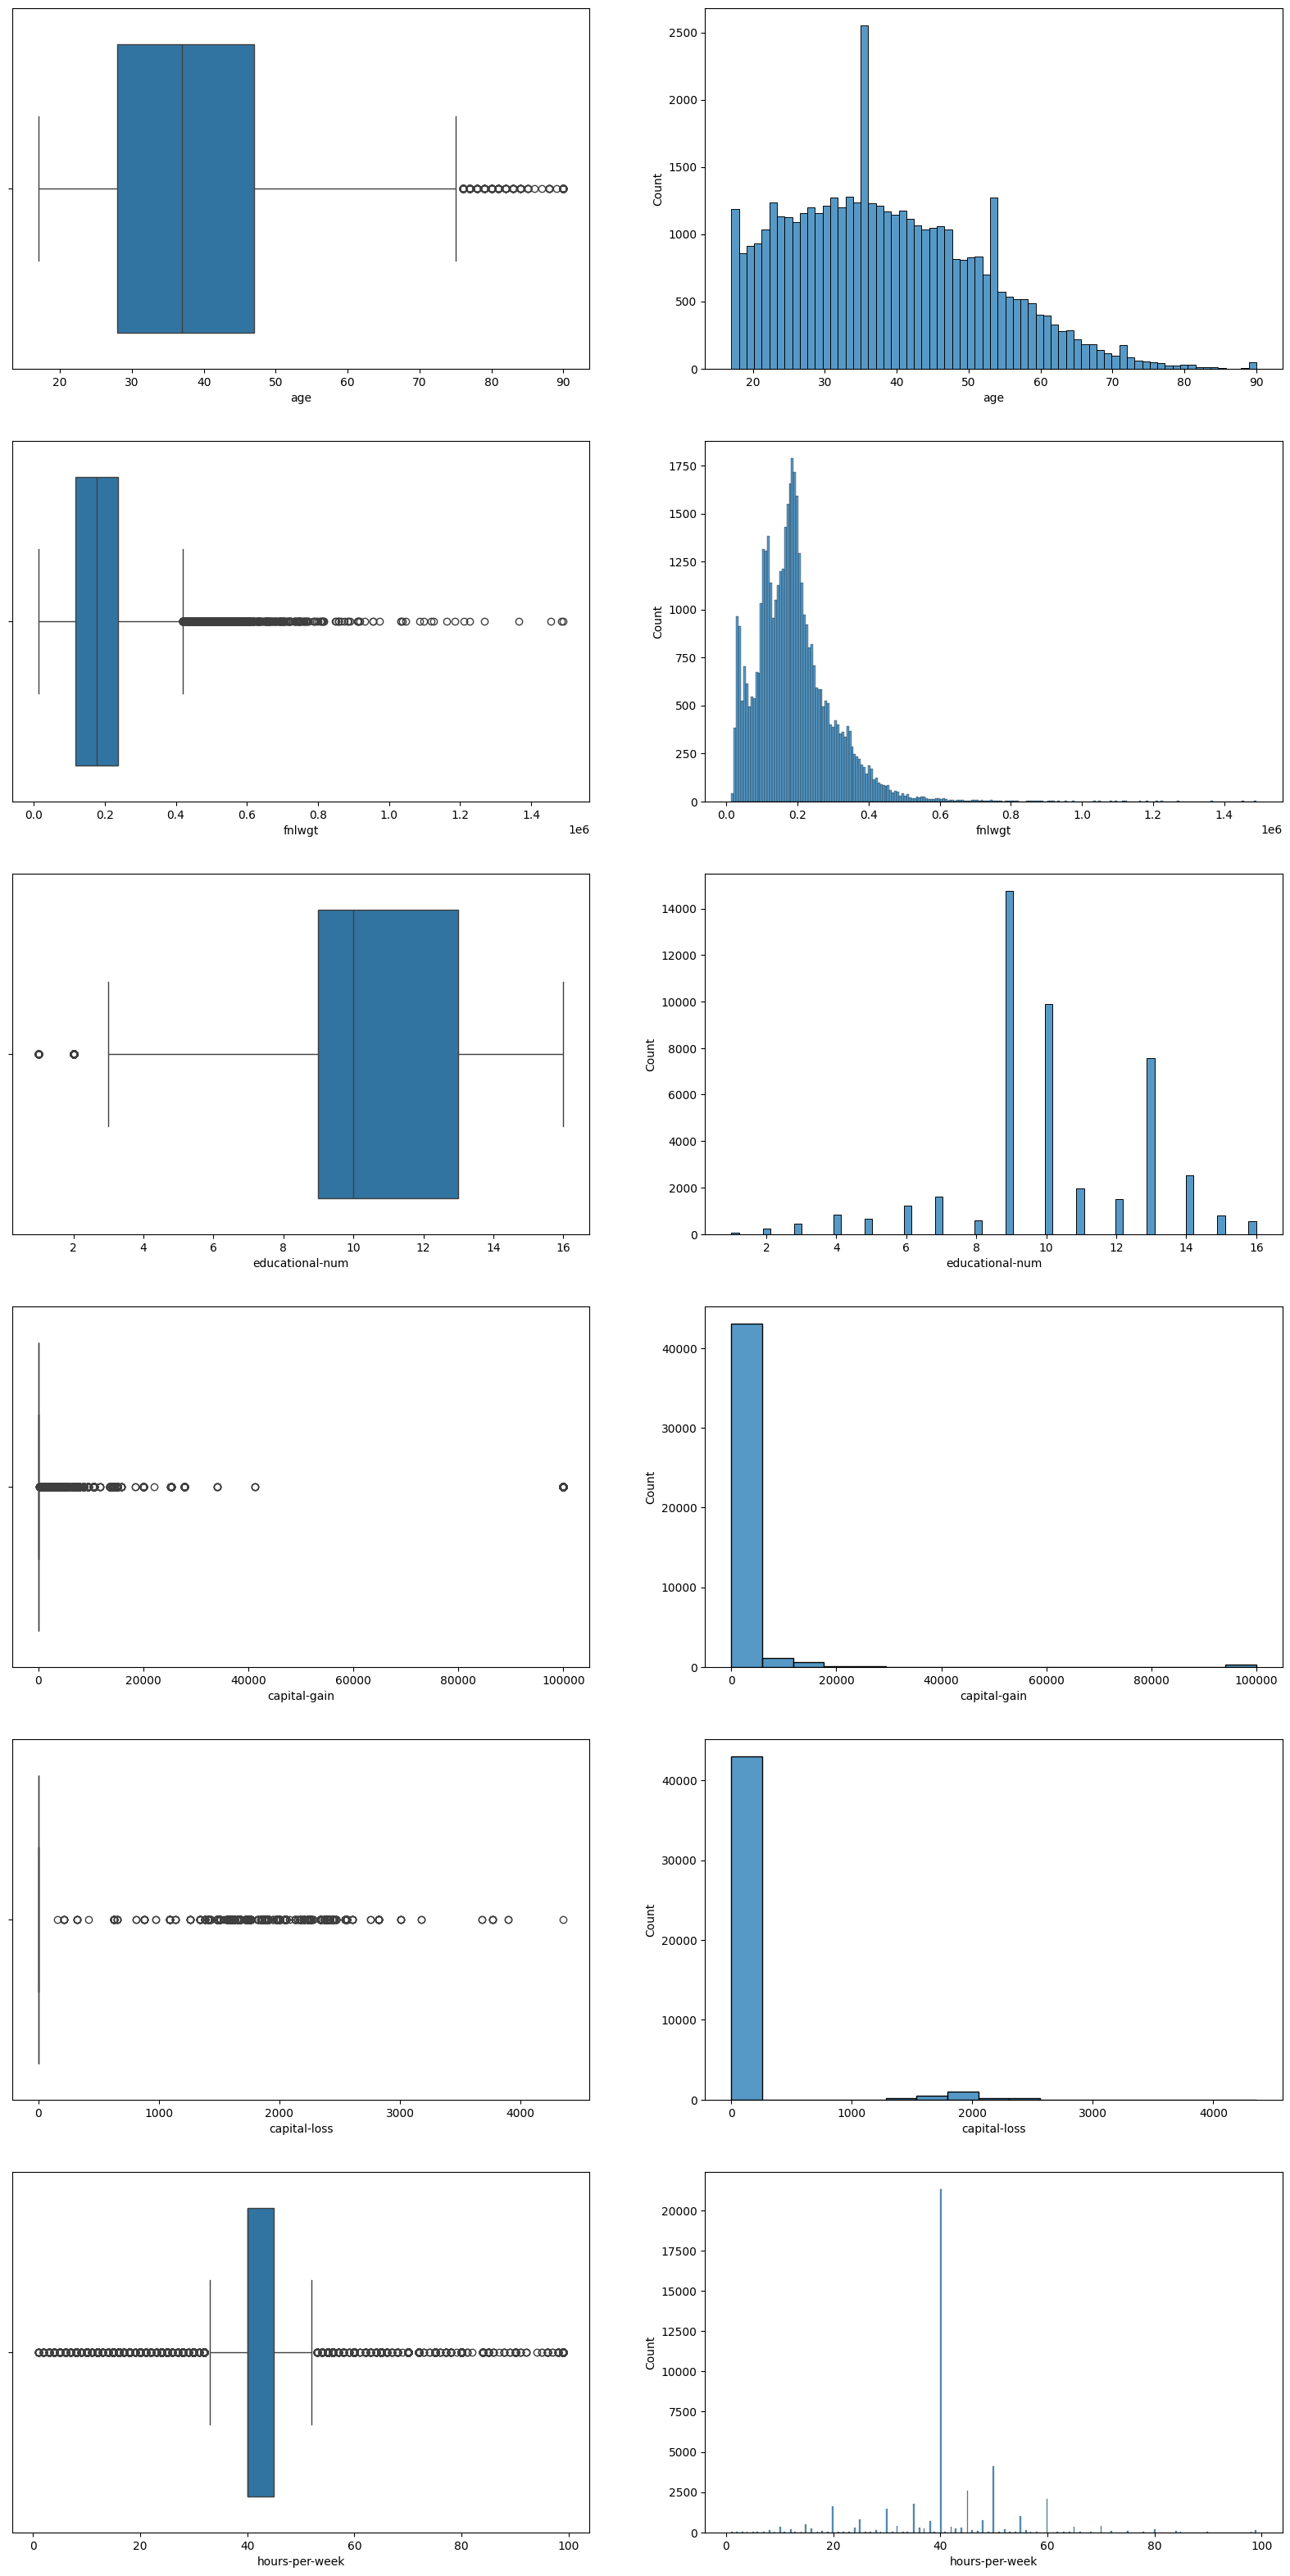

In [37]:
#Boxplot and Histplot for all numeric features
index=0
plt.figure(figsize=(20,40))
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(6,2,index)
    sns.boxplot(x=feature,data=df,whis=1.5)
    index+=1
    plt.subplot(6,2,index)
    sns.histplot(x=feature,data=df)


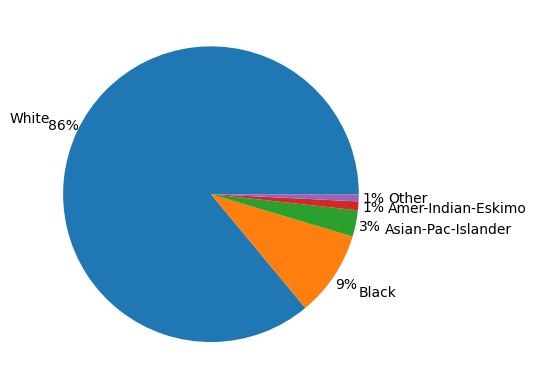

In [38]:
#visiualize How many of each race are represented in this dataset
plt.pie(df.race.value_counts(), labels=df.race.value_counts().index, autopct='%.0f%%', labeldistance=1.2, pctdistance=1.1);

education
10th             1223
11th             1619
12th              575
1st-4th           220
5th-6th           447
7th-8th           822
9th               676
Assoc-acdm       1507
Assoc-voc        1958
Bachelors        7559
Doctorate         544
HS-grad         14770
Masters          2513
Preschool          70
Prof-school       785
Some-college     9887
Name: count, dtype: int64


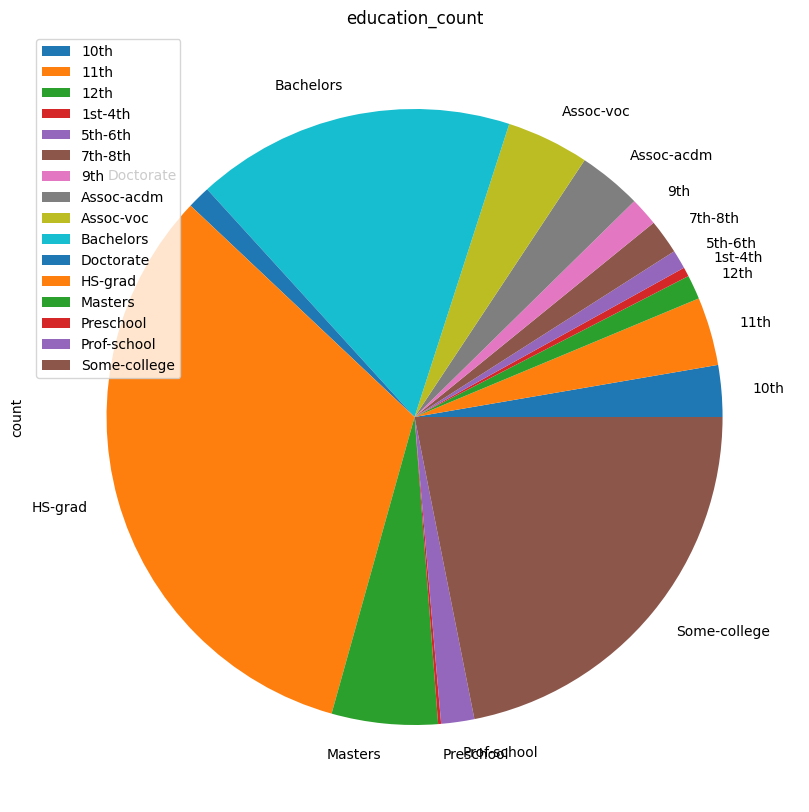

In [20]:
counts=df['education'].value_counts().sort_index()
print(counts)
counts.plot(kind='pie',title='education_count',figsize=(11,10))
plt.legend()
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["income"] = label_encoder.fit_transform(df["income"])


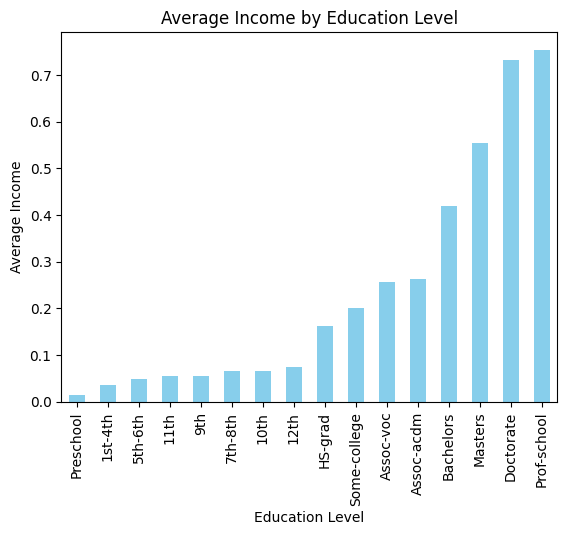

In [40]:
# Group by education and calculate the average income for each education level
average_income_by_education = df.groupby("education")["income"].mean()

# Sort the values for better visualization (optional)
average_income_by_education = average_income_by_education.sort_values()

# Create bar plot
average_income_by_education.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')

# Show plot
plt.show()

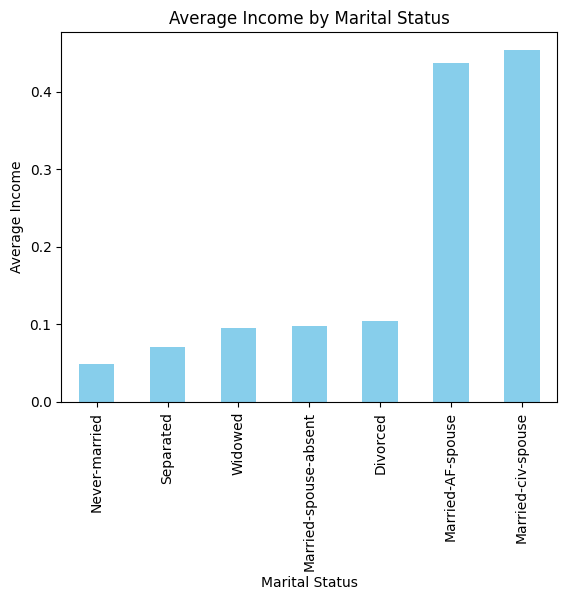

In [41]:
average_income_by_marital_status = df.groupby("marital-status")["income"].mean()

# Sort the values for better visualization (optional)
average_income_by_marital_status = average_income_by_marital_status.sort_values()

# Create bar plot
average_income_by_marital_status.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')

# Show plot
plt.show()

# PreProcessing

education = Education Number so we can drop one of them
capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k). Also from df.describe() we can see that most of value are zero, so we can even remove this
Capital_loss also same capital gain so we can remove this also

In [ ]:
#df.drop(['education','capital-gain','capital-loss'], axis = 1, inplace = True)

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()

In [ ]:
# @title Average Working Hours by Education Level

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
df.groupby('education')['hours-per-week'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Average Hours per Week')
_ = plt.title('Average Working Hours by Education Level')

In [ ]:
# Calculate the value counts of the target column
value_counts = df['income'].value_counts()

# Create bar plot
value_counts.plot(kind='bar')

# Add title and labels
plt.title('Bar Plot of income Column')
plt.xlabel('income')
plt.ylabel('Counts')

# Show plot
plt.show()

## **data is not balance**


